In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import StandardScaler

**Read the image file and plot it.**

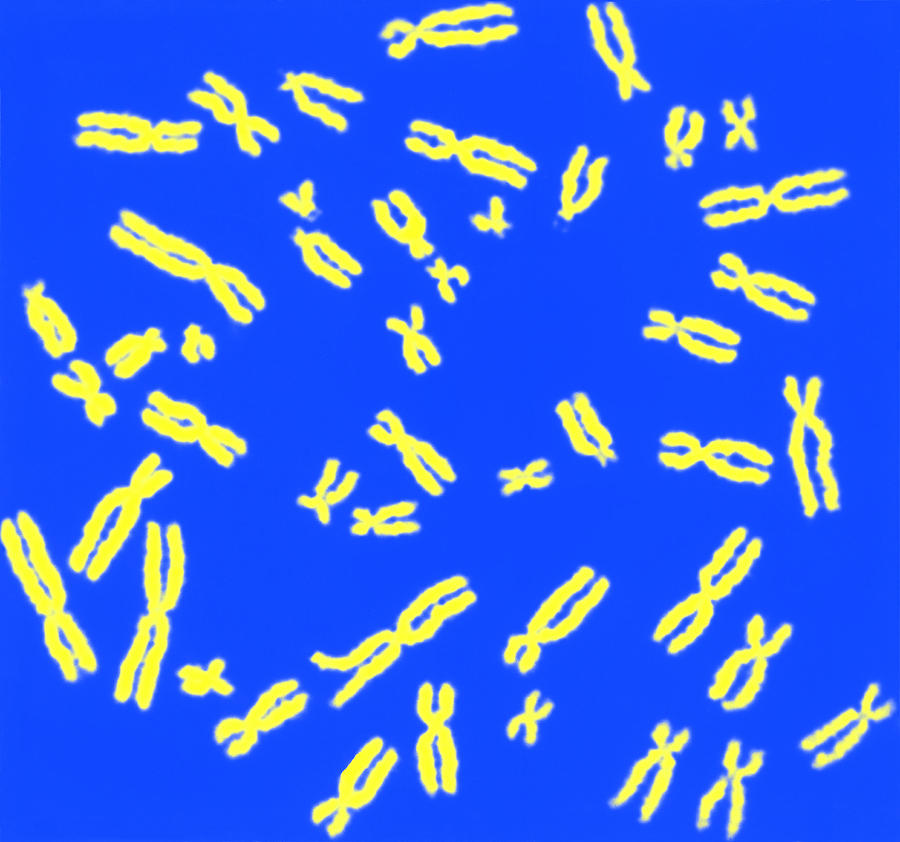

-1

In [ ]:
# Load the input image
image = cv2.imread('chromosomes.jpg')
cv2_imshow(image)
cv2.waitKey(0)

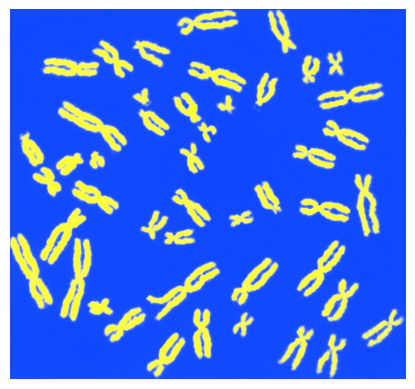

In [ ]:
# Plot the input image

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

**Convert the image into GRAYSCALE**

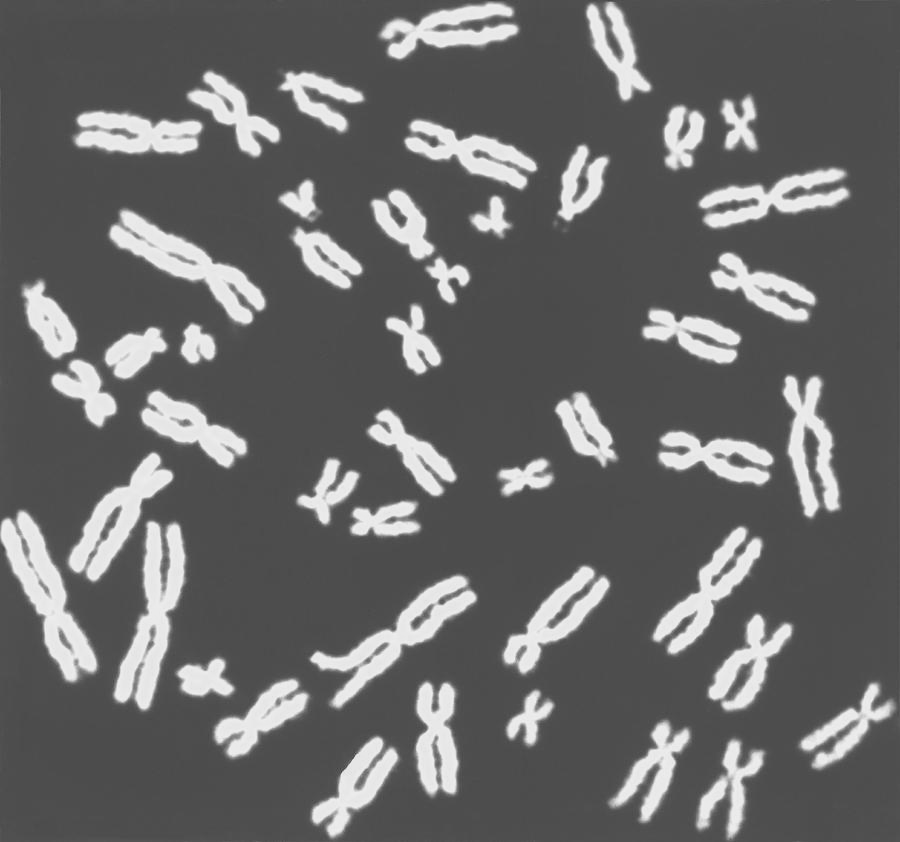

-1

In [ ]:
# Use the cvtColor() function to convert the image into grayscale from BGR
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image)
cv2.waitKey(0)

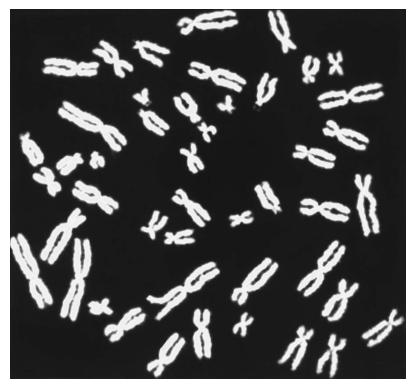

In [ ]:
# Plot the grayscale image

fig = plt.gcf()
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

**Morphological opening** - to remove the blots in the background

---


An opening is an erosion followed by a dilation.

First an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.



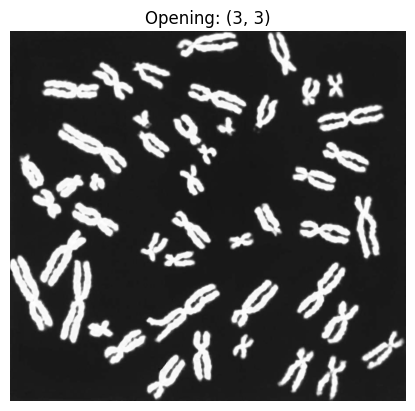

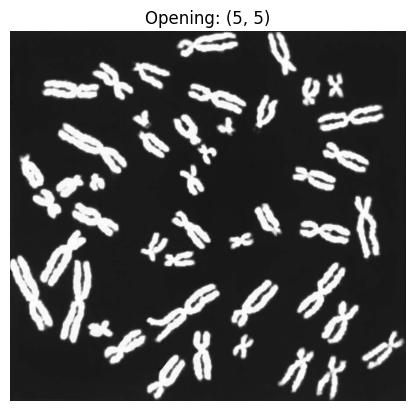

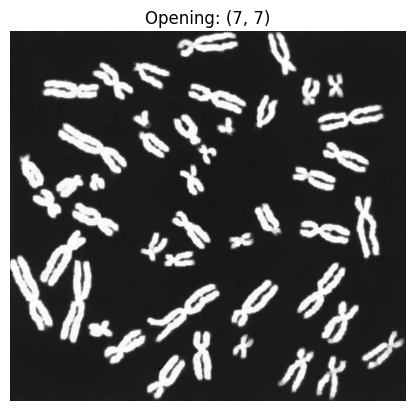

In [ ]:
kernelSizes = [(3, 3), (5, 5), (7, 7)]

for kernelSize in kernelSizes:
	# Construct a rectangular kernel from the current size and then apply an "opening" operation
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
  opening = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

  fig = plt.gcf()
  plt.imshow(opening, cmap='gray')
  plt.title('Opening: ({}, {})'.format(kernelSize[0], kernelSize[1]))
  plt.axis('off')
  plt.show()
  print('\n')

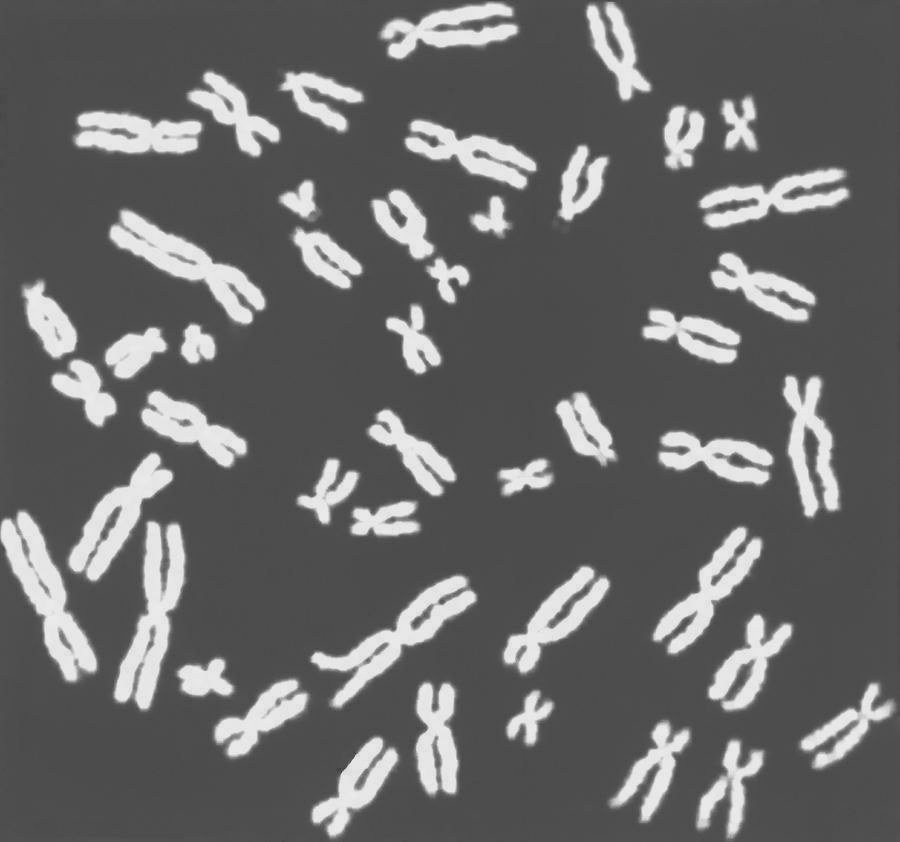

In [ ]:
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (5, 5) )
img_open = cv2.morphologyEx(gray_image, cv2. MORPH_OPEN, kernel)
cv2_imshow(img_open)

**Threshold the image for binarization**

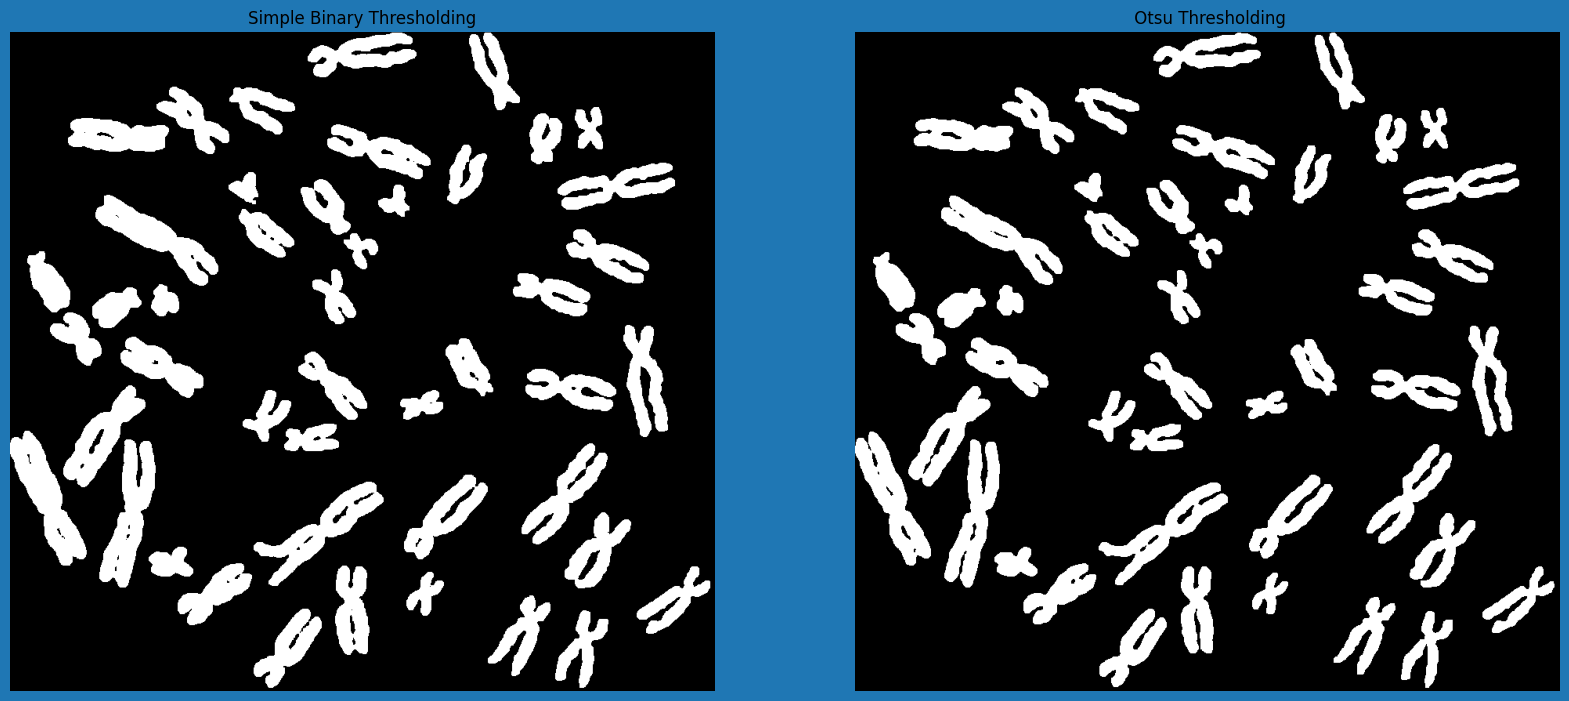

In [ ]:
# Apply different thresholding techniques to find the most suitable one for the image

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 20))

T, thresh_image1 = cv2.threshold(img_open, 127, 255, cv2.THRESH_BINARY)
ax1.imshow(thresh_image1, cmap='gray')
ax1.set_title('Simple Binary Thresholding')
ax1.axis('off')

T, thresh_image2 = cv2.threshold(img_open, 0, 255, cv2.THRESH_OTSU)
ax2.imshow(thresh_image2, cmap='gray')
ax2.set_title(' Otsu Thresholding')
ax2.axis('off')

fig.set_facecolor(color=None)
plt.show()

**Observation** - The segmentation by binarization using Otsu thresholding has more distinct result compared to the output of Simple binary thresholding.

Threshold value T = 149.0



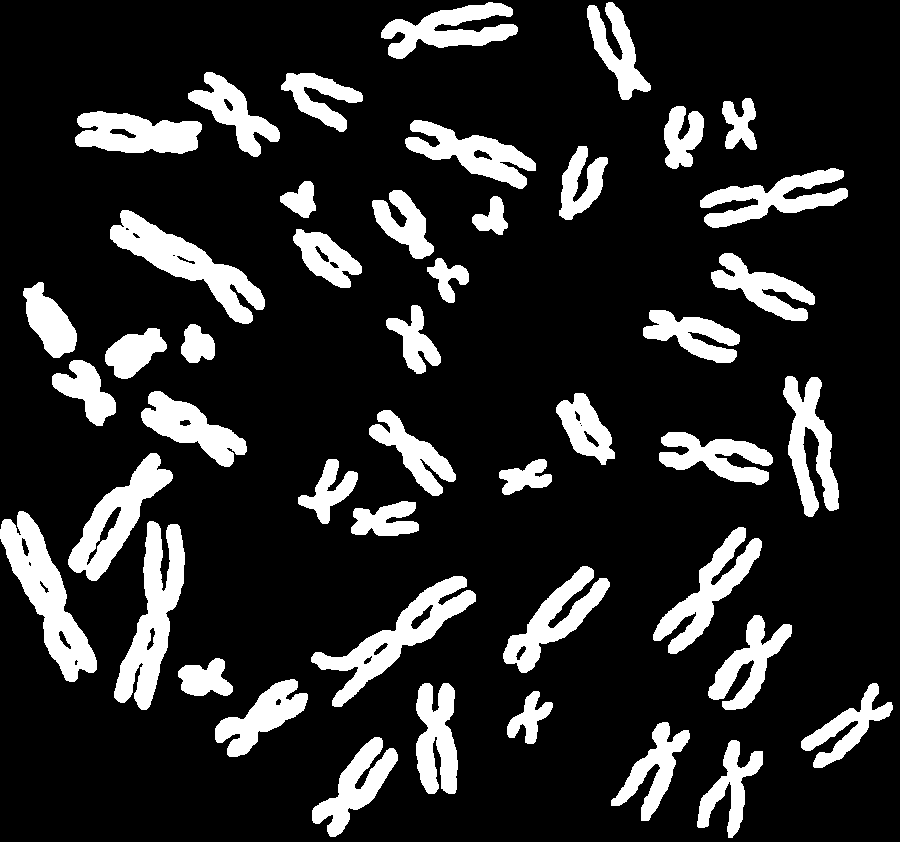

In [ ]:
T, thresh_image = cv2.threshold(img_open, 0, 255, cv2.THRESH_OTSU)
print(f'Threshold value T = {T}\n')
cv2_imshow(thresh_image)

**Find the contours**

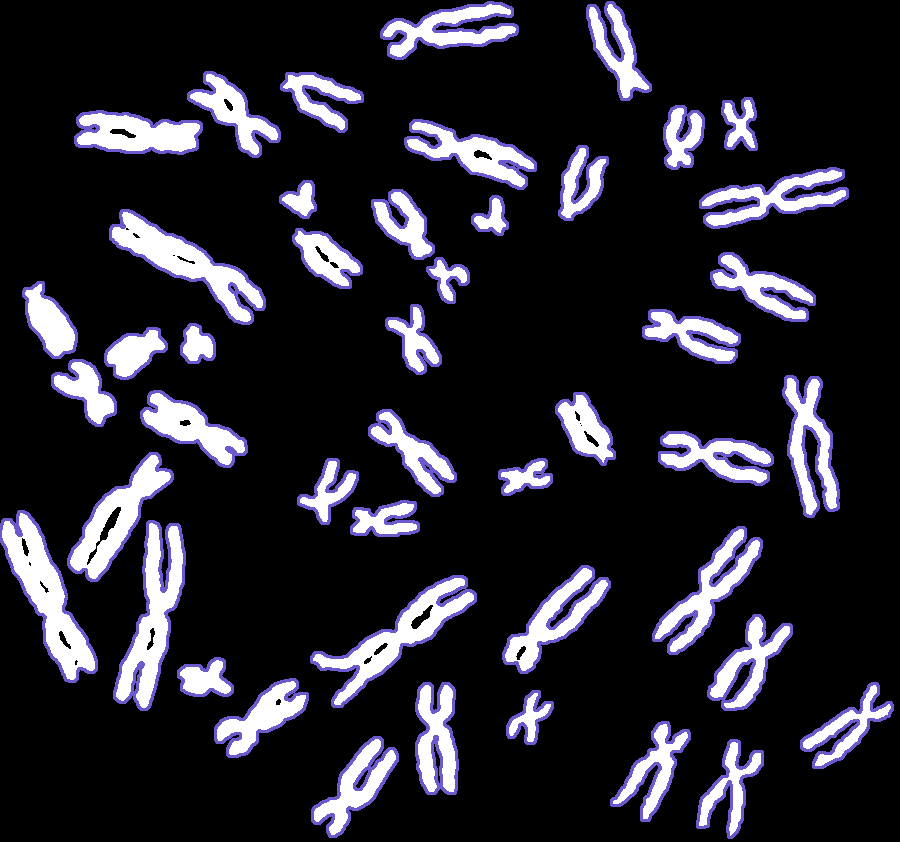

-1

In [ ]:
thresh_copy = thresh_image.copy()
contours, hierarchy = cv2.findContours(thresh_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

img_contour = cv2.cvtColor(thresh_copy, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contour, contours, -1, (205, 90, 106), 2)
cv2_imshow(img_contour)
cv2.waitKey(0)

In [ ]:
n_countours = len(contours)
print("Number of Contours found = " + str(n_countours))

Number of Contours found = 46


**Find the features for each chromosome**

In [ ]:
area = []
perimeter = []
circularity = []
top_left_X = []
top_left_Y = []
height = []
width = []
shape = []

for contour in contours:
  area_contour = cv2.contourArea(contour)
  area.append(area_contour)
  perimeter_contour = cv2.arcLength(contour, True)
  perimeter.append(perimeter_contour)
  circularity.append((4 * np.pi * area_contour) / (perimeter_contour ** 2))

  X, Y, w, h = cv2.boundingRect(contour)
  top_left_X.append(X)
  top_left_Y.append(Y)
  width.append(w)
  height.append(h)
  shape.append(f'{w} x {h}')


chromosome_df = pd.DataFrame({'X': top_left_X,'Y': top_left_Y, 'Width': width, 'Height': height, 'shape_info': shape, 'area': area, 'perimeter': perimeter, 'circularity': circularity})
print(f'Shape of the Chromosome dataframe = {chromosome_df.shape}\n')
chromosome_df

Shape of the Chromosome dataframe = (46, 8)



,X,Y,Width,Height,shape_info,area,perimeter,circularity
0,697,740,66,98,66 x 98,2172.5,415.806130,0.157902
1,312,737,86,100,86 x 100,3092.0,440.558437,0.200190
2,611,722,79,99,79 x 99,2515.5,431.203098,0.170008
3,507,691,46,53,46 x 53,1000.0,213.338094,0.276104
4,801,683,92,85,92 x 85,2285.0,438.901583,0.149060
5,416,683,42,111,42 x 111,3206.5,475.462984,0.178241
6,215,679,93,78,93 x 78,2957.0,354.534052,0.295628
7,178,658,55,38,55 x 38,1324.5,180.267026,0.512188
8,708,615,84,95,84 x 95,2912.0,460.759447,0.172366
9,311,576,165,131,165 x 131,5432.0,612.582822,0.181903


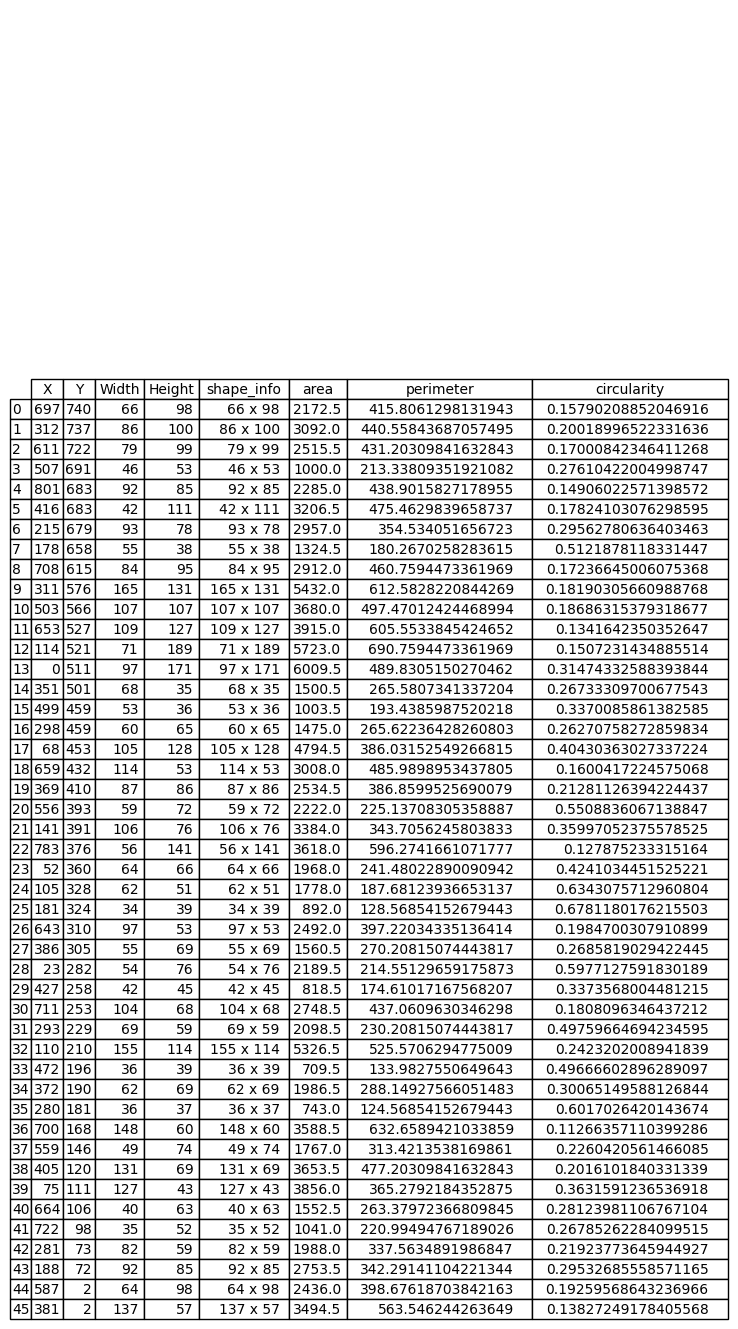

In [ ]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

df_table = table(ax, chromosome_df)
ax.set_frame_on(False)
df_table.auto_set_column_width(range(len(chromosome_df.columns)))
df_table.auto_set_font_size(True)
df_table.scale(1.2, 1.2)
plt.savefig('Output_Chromosome_DataFrame.png', format = 'png')

In [ ]:
list(range(len(chromosome_df.columns)))

[0, 1, 2, 3, 4, 5, 6, 7]

**Draw a bounding box for each chromosome**

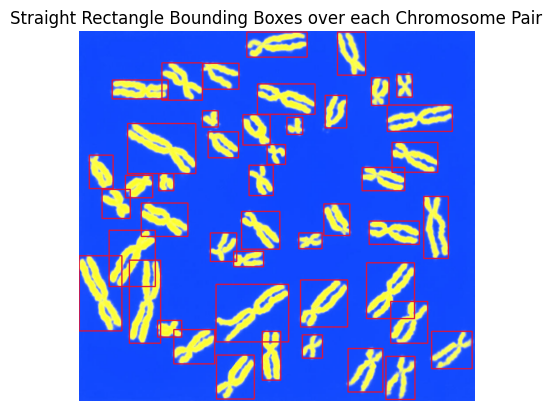

In [ ]:
img = image.copy()

for idx in range(n_countours):
  X = top_left_X[idx]
  Y = top_left_Y[idx]
  h = height[idx]
  w = width[idx]

  cv2.rectangle(img,(X, Y),(X + w, Y + h), (60, 20, 220), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
plt.axis('off')
plt.title('Straight Rectangle Bounding Boxes over each Chromosome Pair')
plt.imshow(img_rgb)
plt.savefig('Straight_Rectangle_Bounding_Boxes.png', format = 'png')

**Normalise all the features using z-scoring**

In [ ]:
scaler = StandardScaler().set_output(transform="pandas")

chr_df = chromosome_df.drop(['shape_info'], axis=1)
scaled_chromosome_df = scaler.fit_transform(chr_df)
scaled_chromosome_df

,X,Y,Width,Height,area,perimeter,circularity
0,1.299555,1.711050,-0.414485,0.553956,-0.346347,0.355871,-0.914526
1,-0.380994,1.697105,0.182270,0.611283,0.342358,0.524524,-0.630160
2,0.924160,1.627382,-0.026595,0.582619,-0.089440,0.460780,-0.833117
3,0.470193,1.483287,-1.011241,-0.735907,-1.224549,-1.023674,-0.119671
4,1.753522,1.446101,0.361296,0.181329,-0.262085,0.513235,-0.973984
5,0.072972,1.446101,-1.130592,0.926583,0.428118,0.762351,-0.777756
6,-0.804405,1.427508,0.391134,-0.019317,0.241243,-0.061615,0.011616
7,-0.965913,1.329896,-0.742701,-1.165862,-0.981499,-1.249009,1.467883
8,1.347571,1.130022,0.122594,0.467965,0.207538,0.662166,-0.817260
9,-0.385359,0.948742,2.539453,1.499855,2.095016,1.696637,-0.753131


In [ ]:
def detect_outliers_zscore(data):
  outliers = []
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
      z_score = (i-mean)/std
      if (np.abs(z_score) > thres):
          outliers.append(i)
  return outliers

In [ ]:
cols = chr_df.columns

for col in cols:
  sample_outliers = detect_outliers_zscore(chromosome_df[col])
  print(f'Outliers from Z-scores method in {col} = {sample_outliers}')

Outliers from Z-scores method in X = []
Outliers from Z-scores method in Y = []
Outliers from Z-scores method in Width = []
Outliers from Z-scores method in Height = [189]
Outliers from Z-scores method in area = []
Outliers from Z-scores method in perimeter = []
Outliers from Z-scores method in circularity = []
